# 网络犯罪文本分析

指标的可视化

In [674]:
import pyLDAvis
import pyLDAvis.gensim

In [678]:
pyLDAvis.enable_notebook()
p_fact = pyLDAvis.gensim.prepare(model, corpus_w, dict_w)
p_fact

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.026024  0.114734       1        1  33.680916
1      0.194013 -0.069322       2        1  25.207409
0     -0.148723 -0.093335       3        1  21.709871
2     -0.071314  0.047923       4        1  19.401806, topic_info=     Term         Freq        Total Category  logprob  loglift
450    公司  2879.000000  2879.000000  Default  30.0000  30.0000
253    游戏  1177.000000  1177.000000  Default  29.0000  29.0000
363    账号  2263.000000  2263.000000  Default  28.0000  28.0000
716    上诉  1508.000000  1508.000000  Default  27.0000  27.0000
5      QQ  2402.000000  2402.000000  Default  26.0000  26.0000
..    ...          ...          ...      ...      ...      ...
230    机关   318.038239  1894.753296   Topic4  -5.4974  -0.1449
391  违法所得   297.825195  1614.882690   Topic4  -5.5630  -0.0507
185    提出   296.732361  1782.122559   Topic4  -5.5667  -0.1529
157    微信   285.174408  2496.866699   Topic4  -5.6064  -0.5299
639    出售   281.675537  2846.194092   Topic4  -5.6188  -0.6732

[339 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
4653      1  0.980627    AA
8498      3  0.987385   App
2167      2  0.056307  DDOS
2167      3  0.934689  DDOS
2574      1  0.025316  IP地址
...     ...       ...   ...
8261      2  0.988114   陈美华
7745      4  0.978654   陈鑫铭
7234      1  0.986852    露露
1922      1  0.992171    面积
5640      3  0.992545    马洁

[646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

## 3. 当事人信息文本分析

In [676]:
p_info = pyLDAvis.gensim.prepare(info_model, info_corpus_w, info_dict_w)
p_info

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.208181 -0.062800       1        1  17.706160
6      0.144898  0.024760       2        1  16.585957
4      0.167347  0.073164       3        1  15.914366
2      0.003042  0.161759       4        1  15.795073
1     -0.094718 -0.145271       5        1  12.359370
0     -0.150903  0.124416       6        1  11.027349
5      0.138515 -0.176027       7        1  10.611726, topic_info=     Term         Freq        Total Category  logprob  loglift
154   杭州市   542.000000   542.000000  Default  30.0000  30.0000
62    山东省   815.000000   815.000000  Default  29.0000  29.0000
34    因涉嫌  2046.000000  2046.000000  Default  28.0000  28.0000
83     侵犯  1456.000000  1456.000000  Default  27.0000  27.0000
80    广州市   527.000000   527.000000  Default  26.0000  26.0000
..    ...          ...          ...      ...      ...      ...
225    广东    70.096237   519.933350   Topic7  -4.5759   0.2394
30   中专文化    52.173969   368.959473   Topic7  -4.8712   0.2871
35   大专文化    56.527878   660.074524   Topic7  -4.7911  -0.2144
23     浙江    58.496643  1211.921875   Topic7  -4.7568  -0.7878
62    山东省    49.418274   815.834045   Topic7  -4.9255  -0.5607

[438 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3190      3  0.940616   一丁
227       1  0.128793   一年
227       2  0.287307   一年
227       3  0.009907   一年
227       4  0.089164   一年
...     ...       ...  ...
896       1  0.915621  龙岗区
896       3  0.072286  龙岗区
489       5  0.985576  龙岩市
392       6  0.983504  龙泉市
253       4  0.974997  龙湾区

[712 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 5, 3, 2, 1, 6])

In [679]:
pyLDAvis.save_html(p_fact, 'lda_fact.html')
pyLDAvis.save_html(p_info, 'lda_info.html')

In [557]:
info_prob = info_model.get_document_topics(info_corpus_w)

In [558]:
info_prob_list = []
for i in range(len(info_prob)):
#for i in range(10):
    list_i = [0 for i in range(info_num_topics)]
    topic_appeared = [pair[0] for pair in info_prob[i]]
    for j in range(len(topic_appeared)):
        list_i[topic_appeared[j]] = info_prob[i][j][1]
    info_prob_list.append(list_i)

In [559]:
info_prob = pd.DataFrame(info_prob_list)

In [560]:
info_prob.columns = ['info_topic_'+str(i) for i in info_prob.columns]

In [561]:
info_prob.shape

(1853, 7)

In [562]:
info_prob.head()

,info_topic_0,info_topic_1,info_topic_2,info_topic_3,info_topic_4,info_topic_5,info_topic_6
0,0.622771,0.000000,0.083638,0.000000,0.000000,0.260419,0.000000
1,0.000000,0.000000,0.000000,0.984652,0.000000,0.000000,0.000000
2,0.000000,0.109748,0.000000,0.000000,0.000000,0.470399,0.402998
3,0.011991,0.011959,0.012013,0.910062,0.011927,0.011930,0.011961
4,0.000000,0.660962,0.000000,0.000000,0.261688,0.000000,0.068513


In [563]:
info_prob.describe()

,info_topic_0,info_topic_1,info_topic_2,info_topic_3,info_topic_4,info_topic_5,info_topic_6
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,0.145142,0.119459,0.137200,0.216658,0.142604,0.083366,0.135230
std,0.277325,0.243135,0.277453,0.327545,0.274289,0.190896,0.252698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.010234,0.000000,0.000000,0.000000
75%,0.142857,0.080949,0.089255,0.393760,0.137972,0.015933,0.144227
max,0.993686,0.997155,0.997814,0.995355,0.998180,0.995385,0.997975


## 4. 利用LDA 提取的文本特征聚类

以上我们对'当事人信息'与'事实'这两个信息丰富的文本数据提取了主题Topic,分别得到了4个和7个指标,且均为连续型变量,适合进行K-Means聚类.

In [564]:
feature = pd.concat([fact_prob,info_prob],axis=1)

In [565]:
feature.head()

,fact_topic_0,fact_topic_1,fact_topic_2,fact_topic_3,info_topic_0,info_topic_1,info_topic_2,info_topic_3,info_topic_4,info_topic_5,info_topic_6
0,0.000000,0.000000,0.999242,0.000000,0.622771,0.000000,0.083638,0.000000,0.000000,0.260419,0.000000
1,0.510624,0.000000,0.000000,0.488436,0.000000,0.000000,0.000000,0.984652,0.000000,0.000000,0.000000
2,0.000000,0.992046,0.000000,0.000000,0.000000,0.109748,0.000000,0.000000,0.000000,0.470399,0.402998
3,0.000000,0.126875,0.000000,0.871644,0.011991,0.011959,0.012013,0.910062,0.011927,0.011930,0.011961
4,0.000000,0.920141,0.074492,0.000000,0.000000,0.660962,0.000000,0.000000,0.261688,0.000000,0.068513


In [566]:
feature.shape

(1853, 11)

In [572]:
#尝试聚类
from sklearn.cluster import KMeans
from sklearn import metrics
#计算silhouette_score与类内方差inertias
range_n_clusters = [i for i in range(2,21)]
results = []
inertias = []
for c in range_n_clusters:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0)
    cluster_labels = kmeans.fit_predict(feature)
    silhouette_avg = metrics.silhouette_score(feature,cluster_labels)
    results.append([c,silhouette_avg])
    inertias.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center.
result = pd.DataFrame(results,columns=['n_clusters','silhouette_score'])
pivot = pd.pivot_table(result,index='n_clusters',values='silhouette_score')

In [573]:
#计算一类时类内方差，作为方差百分比的分母
kmeans_1 = KMeans(init='k-means++',n_clusters=1,n_init=100,random_state=0)
label_1 = kmeans_1.fit_predict(feature)
total = round(kmeans_1.inertia_)

In [574]:
percent = (np.round(inertias))/total

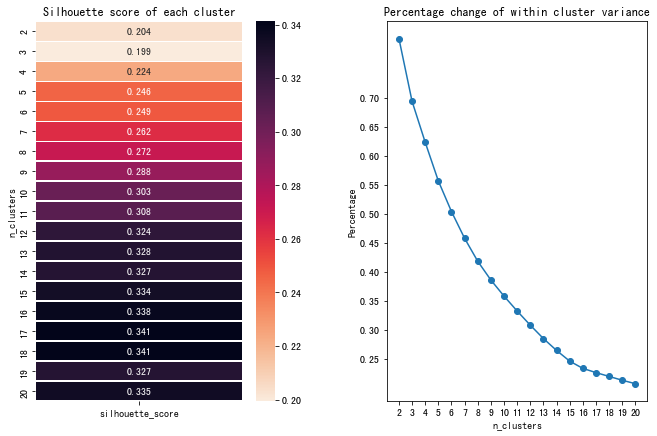

In [577]:
#作图
import seaborn as sns
plt.figure()
plt.rcParams['figure.figsize'] = (10,10) 
plt.subplots_adjust(wspace=20)
plt.subplot(121)
sns.heatmap(pivot,annot=True,linewidths=0.5,fmt='.3f',cmap=sns.cm.rocket_r)
plt.title('Silhouette score of each cluster')
plt.tight_layout()
plt.subplot(122)
plt.plot(range_n_clusters,percent,marker='o')
plt.xticks(range_n_clusters)
plt.yticks([0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70])
plt.title('Percentage change of within cluster variance')
plt.xlabel('n_clusters')
plt.ylabel('Percentage')
plt.show()

可以看出,根据silhouette得分与方差下降速率的综合结果,选取15类较为合适.

In [579]:
kmeans_15 = KMeans(init='k-means++',n_clusters=15,n_init=100,random_state=0)
labels = pd.DataFrame(kmeans_15.fit(feature).labels_)
clustered_data = pd.DataFrame(feature).assign(Cluster=labels)
clustered_data.head()

,fact_topic_0,fact_topic_1,fact_topic_2,fact_topic_3,info_topic_0,info_topic_1,info_topic_2,info_topic_3,info_topic_4,info_topic_5,info_topic_6,Cluster
0,0.000000,0.000000,0.999242,0.000000,0.622771,0.000000,0.083638,0.000000,0.000000,0.260419,0.000000,0
1,0.510624,0.000000,0.000000,0.488436,0.000000,0.000000,0.000000,0.984652,0.000000,0.000000,0.000000,5
2,0.000000,0.992046,0.000000,0.000000,0.000000,0.109748,0.000000,0.000000,0.000000,0.470399,0.402998,4
3,0.000000,0.126875,0.000000,0.871644,0.011991,0.011959,0.012013,0.910062,0.011927,0.011930,0.011961,5
4,0.000000,0.920141,0.074492,0.000000,0.000000,0.660962,0.000000,0.000000,0.261688,0.000000,0.068513,14


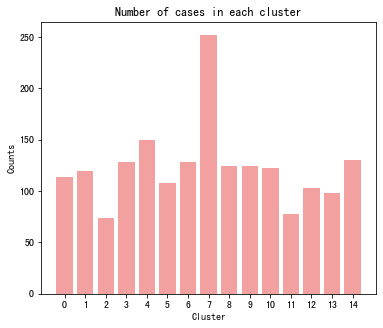

In [582]:
import collections
label_count = collections.Counter(kmeans_15.labels_)
label_count = label_count.most_common()
df_label = pd.DataFrame(label_count)
df_label.columns = ['cluster','count']
df_label = df_label.sort_values(by='cluster',ascending=True).reset_index(drop=True)
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (6,5) 
plt.bar(df_label['cluster'],df_label['count'],facecolor='lightcoral', alpha=0.75)
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.title('Number of cases in each cluster')
ax.set_xticks(range(15))
plt.show()

In [590]:
#各类中心点
centers = kmeans_15.cluster_centers_
center_topic =[]
for i in range(len(centers)):
    topic_list = []
    topic_list.append(np.argmax(centers[i][0:4]))
    topic_list.append(np.argmax(centers[i][4:11]))
    center_topic.append(topic_list)

In [594]:
pd.DataFrame(center_topic,columns=['fact_topic','info_topic'],index=['Cluster'+str(i) for i in range(15)])

,fact_topic,info_topic
Cluster0,2,3
Cluster1,1,0
Cluster2,0,3
Cluster3,1,4
Cluster4,1,5
Cluster5,3,3
Cluster6,3,6
Cluster7,1,3
Cluster8,3,0
Cluster9,1,2


可见,根据LDA所提取的主题,样本被聚成了15类.

## 5. word2vec聚类

### 5.1 采用中文预训练词向量模型

这里采用GitHub标星8k的中文预训练300维的词向量模型,搜集自各大新闻网页与百度百科等平台,更贴合法律文书分析.  
https://github.com/Embedding/Chinese-Word-Vectors![image.png](attachment:image.png)  
但意外的是,该词向量模型对于本案例的数据集并未带来提升,可能是因为部分法律词汇在原文本集中并未以恰当的方式衡量,造成"水土不服".

In [250]:
pre_train = stopwordslist('sgns.merge.word')

In [252]:
#from gensim.models.word2vec import KeyedVectors
from gensim.models import KeyedVectors
wv_from_text = KeyedVectors.load_word2vec_format('sgns.merge.word', binary=False)

In [271]:
print(r"'微信', '支付宝'的词向量间相似度为: ",wv_from_text.similarity('支付宝','微信'))
print(r"'银行卡', '密码'的词向量间相似度为: ",wv_from_text.similarity('银行卡','密码'))
print(r"'网吧', '服务器'的词向量间相似度为: ",wv_from_text.similarity('网吧','服务器'))

'微信', '支付宝'的词向量间相似度为:  0.6163013
'银行卡', '密码'的词向量间相似度为:  0.42664036
'微信', 'QQ'的词向量间相似度为:  0.44300342


In [255]:
wv_from_text.syn0.std()

<ipython-input-255-dc96ca33afa6>:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  wv_from_text.syn0.std()


0.20791432

In [595]:
w2v = pd.DataFrame(fact['words']+info['words']) #由于采用预训练的词向量模型,因此二者不必分开处理
#w2v['words'] = fact.words

In [601]:
#将词向量存储至vec列
w2v['vec'] = [[] for i in range(w2v.shape[0])]
drop_case = []
for i in range(len(w2v['vec'])):
    vec_list = []
    #vec_list = [model_w2v.wv[token] for token in case.words[i]]
    for token in w2v.words[i]:
        #这里由于未对词频为1的词予以考虑，当在model_w2v.wv查询不到时会发出异常，这里catch到异常后进入下一轮循环
        try: 
            token_vec = wv_from_text.wv[token]
            vec_list.append(token_vec)
        except(KeyError):
            continue
    
    if vec_list:
        mean_vec = (np.mean(vec_list,axis=0)).tolist() #取均值作为每个case新的向量
        w2v['vec'][i] = (w2v['vec'][i])+(mean_vec)
    else:
        drop_case.append(i) #vec_list为空，表明该文本不具有c词向量预训练的词汇，后续进行删除

<ipython-input-601-a8d43e92b2da>:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  token_vec = wv_from_text.wv[token]


In [602]:
w2v

,words,vec
0,"[经审, 理查, 同案, 胡某, 已判决, 电脑, 木马病毒, 盗窃, 游戏, 装备, 游戏...","[0.10161897540092468, 0.03882720693945885, 0.0..."
1,"[经审, 理查, 戴宝来, 能够, 推销, 公司, 装修, 业务, 创造, 营利, 童君莉,...","[0.03314141556620598, 0.03103737346827984, -0...."
2,"[上述事实, 张宵, 王战斌, 庭审, 异议, 同案犯, 孙昆, 李某, 供述, 证人, 陈...","[0.11670494079589844, 0.026810288429260254, -0..."
3,"[上述事实, 当庭, 提供, 证据, 认为, 苏小永, 行为, 已触犯, 中华人民共和国, ...","[0.08787157386541367, 0.04671362414956093, -0...."
4,"[审查, 一致, 中列明, 庭审, 举证, 质证, 本案, 证据, 合法性, 客观性, 关联...","[0.12797752022743225, -0.008274917490780354, -..."
...,...,...
1848,"[经审, 理查, 月份, 贷款, 公司, 期间, 获得, 客户资源, 先后, 多次, 上线,...","[0.09488210827112198, 0.04634637385606766, -0...."
1849,"[经审, 理查, 证据, 指控, 一致, 本院认为, 焦晨阳, 行为, 构成, 非法, 控制...","[0.09334556013345718, 0.05534306541085243, -0...."
1850,"[经审, 理查, 谭浩, 得知, 东阿, 阿胶, 胶员, 购买, 东阿, 阿胶, 防伪, 录...","[0.10022394359111786, 0.03598220646381378, -0...."
1851,"[经审, 理查, 本院认为, 任某, 李某, 违反, 国家有关, 规定, 合法经营, 活动,...","[0.13443134725093842, 0.020110057666897774, -0..."


In [604]:
print(drop_case) #查看是否有需要删除的列,暂无

[]


In [606]:
df_vec = pd.DataFrame(w2v.vec.values.tolist())
df_vec.tail() #300维词向量

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1848,0.094882,0.046346,-0.114045,0.019717,-0.084142,0.123591,0.036657,0.190418,0.128728,0.258779,...,0.249413,-0.070914,-0.294092,0.242772,-0.054448,-0.073549,-0.150293,0.176471,-0.039110,-0.122047
1849,0.093346,0.055343,-0.161025,0.033260,-0.035299,0.183450,-0.021420,0.240083,0.122811,0.254044,...,0.242606,-0.031451,-0.257287,0.226003,-0.091303,-0.086862,-0.185114,0.154691,0.009400,-0.146515
1850,0.100224,0.035982,-0.056916,0.040516,-0.073706,0.125361,0.082434,0.181216,0.090180,0.276618,...,0.299708,-0.042389,-0.250967,0.213659,-0.048228,-0.076290,-0.183376,0.100467,-0.029253,-0.151760
1851,0.134431,0.020110,-0.193212,-0.006320,-0.085741,0.224020,0.049760,0.239204,0.126267,0.318283,...,0.213174,-0.115002,-0.357885,0.245079,-0.128649,-0.119937,-0.188537,0.133458,-0.087987,-0.155122
1852,0.011157,0.047739,-0.163928,0.103927,-0.042791,0.138469,0.017608,0.186733,0.123604,0.234634,...,0.196111,-0.061087,-0.289974,0.246688,-0.079327,-0.077717,-0.166255,0.162391,0.038501,-0.080203


In [607]:
#尝试聚类
from sklearn.preprocessing import StandardScaler
df_vec = StandardScaler().fit_transform(df_vec) #数据标准化

###  5.2 尝试聚类

In [608]:
#计算silhouette_score与类内方差inertias
range_n_clusters = [i for i in range(2,21)]
results = []
inertias = []
for c in range_n_clusters:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0)
    cluster_labels = kmeans.fit_predict(df_vec)
    silhouette_avg = metrics.silhouette_score(df_vec,cluster_labels)
    results.append([c,silhouette_avg])
    inertias.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center.
result = pd.DataFrame(results,columns=['n_clusters','silhouette_score'])
pivot = pd.pivot_table(result,index='n_clusters',values='silhouette_score')

In [609]:
#计算一类时类内方差，作为方差百分比的分母
kmeans_1 = KMeans(init='k-means++',n_clusters=1,n_init=100,random_state=0)
label_1 = kmeans_1.fit_predict(df_vec)
total = round(kmeans_1.inertia_)

In [610]:
percent = (np.round(inertias))/total

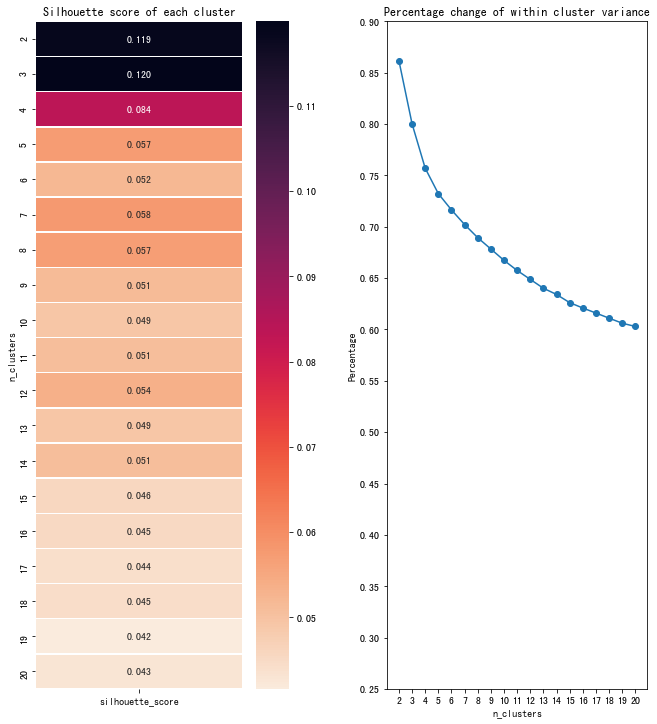

In [615]:
#作图
import seaborn as sns
plt.figure()
plt.rcParams['figure.figsize'] = (10,10) 
plt.subplots_adjust(wspace=20)
plt.subplot(121)
sns.heatmap(pivot,annot=True,linewidths=0.5,fmt='.3f',cmap=sns.cm.rocket_r)
plt.title('Silhouette score of each cluster')
plt.tight_layout()
plt.subplot(122)
plt.plot(range_n_clusters,percent,marker='o')
plt.xticks(range_n_clusters)
plt.yticks([0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90])
plt.title('Percentage change of within cluster variance')
plt.xlabel('n_clusters')
plt.ylabel('Percentage')
plt.show()

可以看到,该模型聚类效果并不好,类内方差的占比持续高于60%,聚类并未较好地分离特征.

### 5.3 自行训练

fact与info分开训练,再拼接

In [652]:
from gensim.models import Word2Vec
fact_w2v = Word2Vec(fact.words, size=100, min_count=5) #仅考虑词频在2以上的词汇
info_w2v = Word2Vec(info.words, size=100, min_count=5) #仅考虑词频在2以上的词汇

In [653]:
fact_wv = fact_w2v.wv
info_wv = fact_w2v.wv

In [654]:
#将词向量存储至vec列
fact['vec'] = [[] for i in range(fact.shape[0])]
info['vec'] = [[] for i in range(info.shape[0])]
drop_case = []
for i in range(len(fact['vec'])):
    vec_list1 = []
    vec_list2 = []
    #vec_list = [model_w2v.wv[token] for token in case.words[i]]
    for token in fact.words[i]:
        #这里由于未对词频为1的词予以考虑，当在model_w2v.wv查询不到时会发出异常，这里catch到异常后进入下一轮循环
        try: 
            token_vec = fact_w2v.wv[token]
            vec_list1.append(token_vec)
        except(KeyError):
            continue
    for token in info.words[i]:
        #这里由于未对词频为1的词予以考虑，当在model_w2v.wv查询不到时会发出异常，这里catch到异常后进入下一轮循环
        try: 
            token_vec = info_w2v.wv[token]
            vec_list2.append(token_vec)
        except(KeyError):
            continue
    
    if vec_list1:
        mean_vec1 = (np.mean(vec_list1,axis=0)).tolist() #取均值作为每个case新的向量
        fact['vec'][i] = (fact['vec'][i])+(mean_vec1)
    else:
        drop_case.append(i) #vec_list为空，表明该文本不具有词频在2以上的词汇，后续进行删除
        
    if vec_list2:
        mean_vec2 = (np.mean(vec_list2,axis=0)).tolist() #取均值作为每个case新的向量
        info['vec'][i] = (info['vec'][i])+(mean_vec2)
    else:
        drop_case.append(i) #vec_list为空，表明该文本不具有词频在2以上的词汇，后续进行删除

<ipython-input-654-3a0a5afbbdb0>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact['vec'][i] = (fact['vec'][i])+(mean_vec1)
<ipython-input-654-3a0a5afbbdb0>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['vec'][i] = (info['vec'][i])+(mean_vec2)


In [655]:
train_vec = pd.DataFrame((fact['vec']+info['vec']).values.tolist())

In [656]:
train_vec.drop(drop_case,inplace=True)
train_vec = train_vec.reset_index(drop=True)
#print('Now there are ',train_vec.shape[0],'cases left.')

Now there are  1831 cases left.


In [657]:
train_vec.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.019650,-0.334590,-0.027069,0.379508,-0.161478,-0.002194,-0.754240,-0.218971,-0.244996,-0.496401,...,0.267973,0.167137,-0.021937,0.202570,-0.327139,-0.209114,0.402898,-0.380760,-0.332101,-0.038797
1,0.391604,-0.323060,-0.002649,0.242491,-0.113467,0.385406,-0.321318,0.091648,-0.101627,0.342352,...,0.590723,0.140163,-0.046951,0.486427,-0.751392,-0.271842,0.100023,0.077804,-0.543086,0.478883
2,-0.077550,-0.489538,-0.180960,0.762479,-0.118803,-0.493420,-0.599297,0.115080,-0.064808,-0.183629,...,0.237057,-0.275785,-0.018732,-0.209354,-0.531730,-0.263614,0.272235,-0.190010,-0.537848,0.267432
3,0.137235,-0.580196,-0.195675,0.377285,-0.368372,0.146955,-0.385452,0.103763,-0.196729,0.413497,...,0.432898,0.153805,-0.051470,0.319505,-0.625427,-0.256706,0.238671,-0.144654,-0.361606,0.181958
4,-0.286243,-0.524156,-0.401850,0.582226,-0.294640,-0.601971,-0.112969,0.329159,-0.093578,-0.148290,...,0.308970,0.072208,-0.111527,0.208107,-0.467740,-0.223899,0.238521,-0.200434,-0.366628,0.127575


In [658]:
from sklearn.preprocessing import StandardScaler
train_vec = StandardScaler().fit_transform(train_vec) #数据标准化

In [659]:
#计算silhouette_score与类内方差inertias
range_n_clusters = [i for i in range(2,21)]
results = []
inertias = []
for c in range_n_clusters:
    kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0)
    cluster_labels = kmeans.fit_predict(train_vec)
    silhouette_avg = metrics.silhouette_score(train_vec,cluster_labels)
    results.append([c,silhouette_avg])
    inertias.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center.
result = pd.DataFrame(results,columns=['n_clusters','silhouette_score'])
pivot = pd.pivot_table(result,index='n_clusters',values='silhouette_score')

In [660]:
#计算一类时类内方差，作为方差百分比的分母
kmeans_1 = KMeans(init='k-means++',n_clusters=1,n_init=100,random_state=0)
label_1 = kmeans_1.fit_predict(df_vec)
total = round(kmeans_1.inertia_)

In [661]:
percent = (np.round(inertias))/total

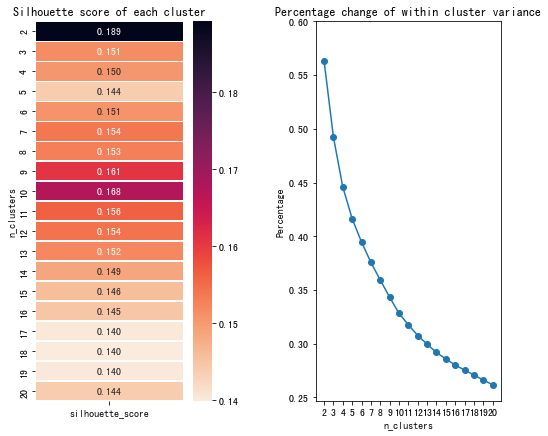

In [710]:
#作图
import seaborn as sns
plt.figure()
plt.rcParams['figure.figsize'] = (6,6) 
plt.subplots_adjust(wspace=20)
plt.subplot(121)
sns.heatmap(pivot,annot=True,linewidths=0.5,fmt='.3f',cmap=sns.cm.rocket_r)
plt.title('Silhouette score of each cluster')
plt.tight_layout()
plt.subplot(122)
plt.plot(range_n_clusters,percent,marker='o')
plt.xticks(range_n_clusters)
plt.yticks([0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60])
plt.title('Percentage change of within cluster variance')
plt.xlabel('n_clusters')
plt.ylabel('Percentage')
plt.show()

综合两指标,选取10类进行聚类

In [663]:
kmeans_10 = KMeans(init='k-means++',n_clusters=10,n_init=100,random_state=0)
labels = pd.DataFrame(kmeans_10.fit(train_vec).labels_)
clustered_data = pd.DataFrame(train_vec).assign(Cluster=labels)
clustered_data.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Cluster
0,-0.132850,0.455117,1.161840,-1.127557,0.186824,0.689942,-1.283694,-1.348232,-1.626850,-1.991199,...,1.080585,0.625283,0.093073,1.207760,0.137686,1.217746,-1.130137,1.033845,-1.046068,8
1,1.683908,0.511185,1.306910,-1.845398,0.438866,1.882035,0.184682,0.293009,-0.647815,1.230243,...,0.941531,0.357931,1.546114,-1.733101,-1.223072,-1.610341,1.925285,-0.731025,1.786463,1
2,-0.607614,-0.298342,0.247626,0.878839,0.410852,-0.820862,-0.758159,0.416817,-0.396389,-0.789918,...,-1.202701,0.659541,-2.015526,-0.210436,-1.044581,-0.002319,0.140831,-0.687212,0.629492,0
3,0.441476,-0.739184,0.160211,-1.139203,-0.899293,1.148661,-0.032845,0.357021,-1.297246,1.503494,...,1.011855,0.309623,0.691652,-0.859928,-0.894718,-0.315721,0.443039,0.787041,0.161811,1
4,-1.626947,-0.466678,-1.064605,-0.065510,-0.512226,-1.154718,0.891356,1.547961,-0.592851,-0.654189,...,0.591220,-0.332287,0.121417,0.233133,-0.183043,-0.317122,0.071377,0.745031,-0.135746,7


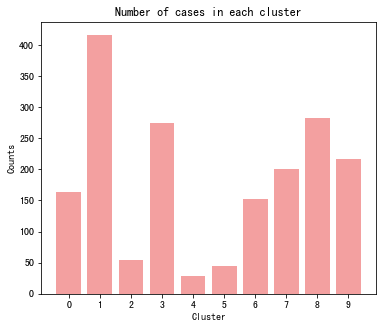

In [665]:
import collections
label_count = collections.Counter(kmeans_10.labels_)
label_count = label_count.most_common()
df_label = pd.DataFrame(label_count)
df_label.columns = ['cluster','count']
df_label = df_label.sort_values(by='cluster',ascending=True).reset_index(drop=True)
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (6,5) 
plt.bar(df_label['cluster'],df_label['count'],facecolor='lightcoral', alpha=0.75)
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.title('Number of cases in each cluster')
ax.set_xticks(range(10))
plt.show()

In [666]:
#各类中心点
centers = kmeans_10.cluster_centers_
center_similar =[]
for i in range(len(centers)):
    similar_list = []
    fact_pairs = fact_wv.most_similar(positive=[centers[i][0:100]],negative=[], topn=20)
    info_pairs = info_wv.most_similar(positive=[centers[i][100:200]],negative=[], topn=20)
    list1=[]
    list2=[]
    for j in range(len(fact_pairs)):
        list1.append(fact_pairs[j][0])
        list2.append(info_pairs[j][0])
    similar_list.append(list1)
    similar_list.append(list2)
    #topic_list.append(np.argmax(centers[i][4:11]))
    center_similar.append(similar_list)

In [668]:
df_center_sim = pd.DataFrame(center_similar,columns=['fact','info'],index=['Cluster'+str(i) for i in range(10)])

In [669]:
df_center_sim

,fact,info
Cluster0,"[姜成, 勒索, 入侵, SAAS, 修改, 操作, 计算机, 计算机系统, 木马程序, 程...","[SAAS, 自动, 系统, 身份验证, 蔡昭福, 破坏, 修改, 刘其, 控制, 关键, ..."
Cluster1,"[某锋, 取自, 名录, 常见问题, 贴文, 等值, 制作, 结论, 发给, 收到, 订单,...","[四条, 第二十五条, 第六十五条, 第六十七条, 第四十二条, 二款, 第三款, 第三十一..."
Cluster2,"[解释, 刑事诉讼法, 第一项, 第一百五十, 八条, 第五项, 第十五条, 第十一条, 第...","[修改, SAAS, 接警, 自动, 某炎, 郑元淼, 开发票, 帮助, 蒋朝辉, 抖音, ..."
Cluster3,"[四哥, 某锋, 取自, 收到, azellty, 赵有, 发给, 常见问题, 名录, 加其...","[数据, 曾理伟, 该份, 梁山, 检查, 电子, 有原, 蔡小红, 勘验, 备忘录, 证物..."
Cluster4,"[北苑, 发现, 地点, 手持, 备忘录, 梁公, 移动硬盘, 家中, 资料, 警方, 签认...","[成立, 梁赟, 有毒, 侵犯, 得罪, 应予, 支持, 人犯, 应予以, 惩罚, 惩处, ..."
Cluster5,"[葛传亮, 处罚金, 葛利兵, 六个月, 兰兰, 因犯, 具结, 唐天, 有期徒刑, 被判,...","[内容, 张凯凯, 含有, 王海博, 表格, 条数, 王红琴, 打印, EXCEL, 涉及,..."
Cluster6,"[幅度, 诈骗罪, 郑辉, 原则, 修正案, 应当, 法定, 综上, 并无不当, 中华人民共...","[数据, 曾理伟, 该份, 蔡小红, 电子, 勘验, 刻录成, 检查, 梁山, 系统, 复函..."
Cluster7,"[郑辉, 诈骗罪, 本罪, 修正案, 幅度, 刑事责任, 盗窃罪, 原则, 三百六十, 陈贤...","[凡友俊, 第二十七条, 摘录, 要求, 第四款, 第二十六条, 第六十五条, 第三十一条,..."
Cluster8,"[常见问题, 取自, 梁公, 资料, 画面, 备忘录, 指认, 截图, 某锋, 名录, 详单...","[赵某, 凡友俊, 某烨, 经营, 组织, 工资, 表弟, 马某, 服务站, 某卫, 小夜,..."
Cluster9,"[詹志明, 张洪超, 归案, 某艳, 甘某, 金鸿霞, 李志, 邓军普, 当庭, 属实, 后...","[黄静, 查获, 刘锋, 张凯凯, 剔除, 审讯, 随案, 天刚, 取证, 条数, 童永星,..."


In [711]:
print(df_center_sim['fact']['Cluster0'])
print(df_center_sim['info']['Cluster0'])

['姜成', '勒索', '入侵', 'SAAS', '修改', '操作', '计算机', '计算机系统', '木马程序', '程序', '测试数据', 'fiddle', '尚百信', '波尔', '隐蔽', '功能性', '服务器', '刘其', '控制软件', '免刷']
['SAAS', '自动', '系统', '身份验证', '蔡昭福', '破坏', '修改', '刘其', '控制', '关键', '郑元淼', '操作', '增加', '蒋朝辉', '网络设备', '客户机', '获取数据', '具备', '正常', '后果严重']


这一个Cluster大概是讲网络犯罪的程序技术操作.

In [673]:
print(df_center_sim['fact']['Cluster6'])
print(df_center_sim['info']['Cluster6'])

['幅度', '诈骗罪', '郑辉', '原则', '修正案', '应当', '法定', '综上', '并无不当', '中华人民共和国', '所犯', '刑事责任', '二百八十', '盗窃罪', '刑罚', '本罪', '区别', '建议', '陈贤平', '本次']
['数据', '曾理伟', '该份', '蔡小红', '电子', '勘验', '刻录成', '检查', '梁山', '系统', '复函', '视听资料', '勘察', '公海', '光盘', '网提', '备忘录', '刻录', '证物', '有原']


这一个Cluster大概是讲网络犯罪的数据刻录操作.

词向量的模型解释性远远不如LDA模型.